In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import math 

import string_boutique as sb

from utils import get_time_diff_from_issue_df, get_count_from_issue_df, get_time_from_issue_df, iqr_outlier_filter, examine_data, extract_months

In [2]:
# Globals
pr_file = 'pr_data.csv'

In [3]:
pr_df = pd.read_csv(pr_file, parse_dates=[sb.opened, sb.reviewed, sb.closed], converters={sb.labels: lambda x: x.split(sb.join_delimiter)})

In [4]:
pd.set_option("display.max_rows", 70)
#pr_df.head(70)
#pr_df.tail(70)
#examine_data(pr_df, 'pr_made', 'closed', 'large', rows=70, func=lambda x,y: x.head(y))

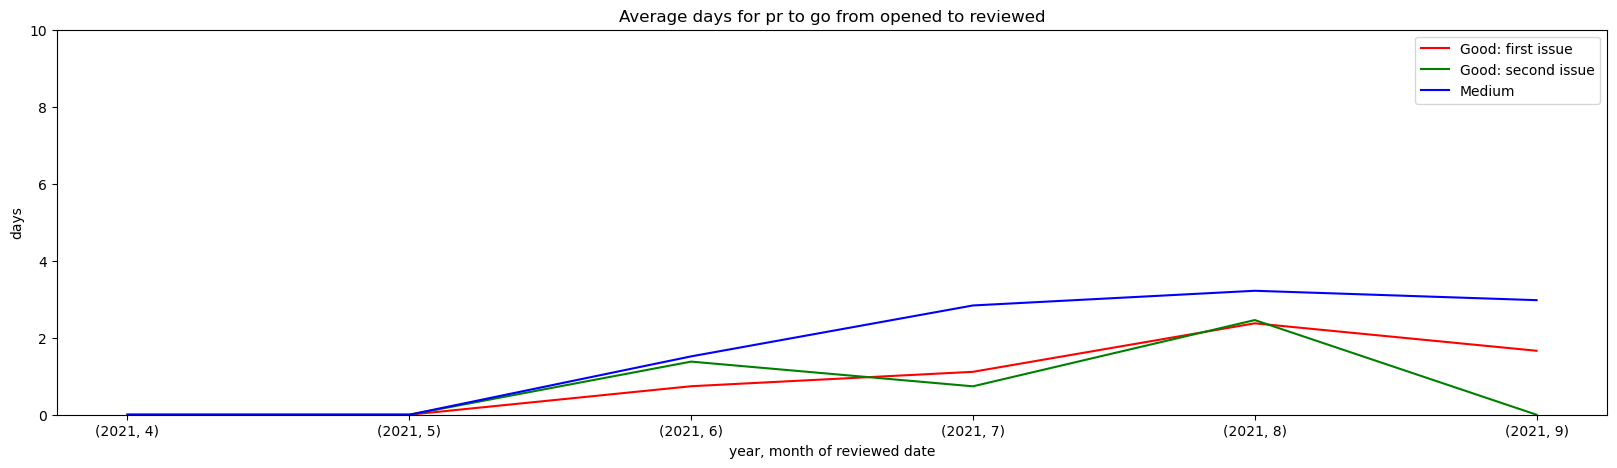

In [5]:
# Plotting
past_count = 6
base_round = 5
time1 = sb.opened
time2 = sb.reviewed
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
#x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'large', 'product')
#all_y.extend(y[-past_count:])
#plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for pr to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

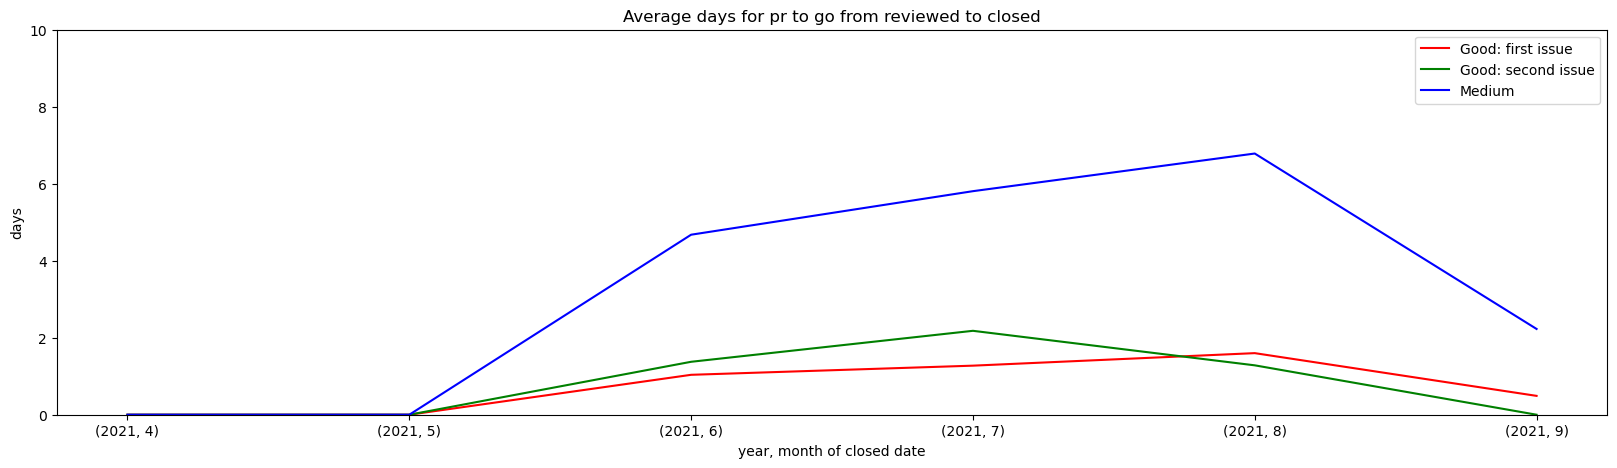

In [6]:
# Plotting
past_count = 6
base_round = 5
time1 = sb.reviewed
time2 = sb.closed
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
#x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'large', 'product')
#all_y.extend(y[-past_count:])
#plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for pr to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

In [7]:
col = sb.review_count
col1 = sb.opened

# Create a copy to avoid modifying the original
copy_df = pr_df.copy()

# Get all the months which will be returned as x values.
all_months = extract_months(copy_df)

# Clean columns.
cleaned_df = copy_df.dropna(subset=[col])

# Format data to account for empty months and datatypes.
total = cleaned_df.groupby([cleaned_df[col1].dt.year, cleaned_df[col1].dt.month])[col].sum()
amount = cleaned_df.groupby([cleaned_df[col1].dt.year, cleaned_df[col1].dt.month])[col].count()
all_count = []
for month in all_months:
    try:
        all_count.append(total[month[0]][month[1]] / amount[month[0]][month[1]])
    except:
        all_count.append(0)
all_months = [str(month) for month in all_months]
all_count = [round(count, 2) for count in all_count]

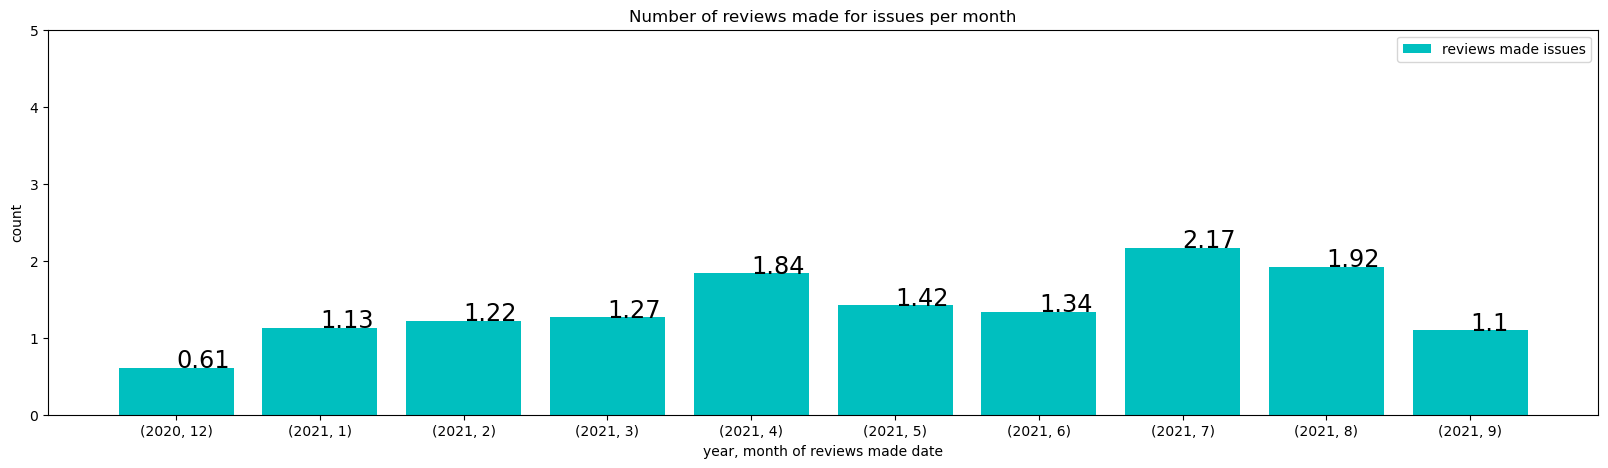

In [8]:
# Plotting
past_count = 10
base_round = 5
col_name = 'reviews made'
plt.figure(figsize=(20,5))
x = all_months
y = all_count
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} for issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()